## QoE Calculation 

### Per-zone quality function ϕ(Zk) is defined as the weighted sum of the four playout characteristics. Such as- 
1) sum of all perceived segments download bitrate, 2) total stall duration 3) total number of quality shifts and 4) startup time

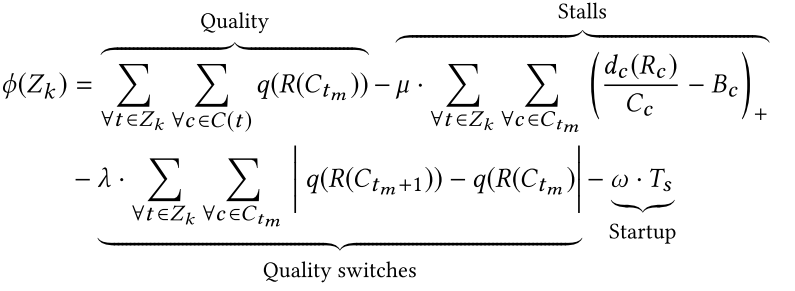

In [1]:
import pandas as pd
from IPython import display
display.Image("image1.png")

### Constant values for estimatiing QoE

In [ ]:
mu = 4.3
lamda = 1
omega= 4.3
alpha1= 0.7
alpha2= 0.3
alpha3= 0

### Import CSV files

In [ ]:
def QoeFeatures(path):

    path1 = str(path)+'-segment.csv'
    path2 = str(path)+'-session.csv'

    try:

        data = pd.read_csv(path1)

        data1 = pd.read_csv(path2)

        data.head(5)

        b1 = data.groupby('Zone')[' Bitrate'].sum()['Z1']
        b2 = data.groupby('Zone')[' Bitrate'].sum()['Z2']
        b3 = data.groupby('Zone')[' Bitrate'].sum()['Z3']

        # Fixing column name order
        data1.rename(columns={' z1_bit': 'til_4k_z3'}, inplace=True)

        data1.rename(columns={' z2_bit': ' z1_bit'}, inplace=True)

        data1.rename(columns={' z3_bit': ' z2_bit'}, inplace=True)

        data1.rename(columns={' til_4k_z3': ' z3_bit'}, inplace=True)

        # Per-zone quality function ϕ(Zk)
        z1 = b1 - (mu * data1.iloc[0][' total_stall']) - (
            lamda * data1.iloc[0][' qt_sw_z1']) - (omega * data1.iloc[0][' start_time'])
        z1

        z2 = b2 - (mu * data1.iloc[0][' total_stall']) - (
            lamda * data1.iloc[0][' qt_sw_z2']) - (omega * data1.iloc[0][' start_time'])
        z2

        z3 = b3 - (mu * data1.iloc[0][' total_stall']) - (
            lamda * data1.iloc[0][' qt_sw_z3']) - (omega * data1.iloc[0][' start_time'])
        z3

        # QoE (ϕ(V )) is modelled as a weighted linear sum of the QoE measurement per zone
        QoE = (alpha1 * z1) + (alpha2 * z2) + (alpha3 * z3)
        QoE

        QoE1 = (alpha1 * z1) + (0.2 * z2) + (0.1 * z3)
        QoE1

        # Add QoE values in the dataframe as new column

        data1['QoE'] = QoE
        data1['QoE1'] = QoE1

        data1.head(5)

        path4 = str(path)+'-session1_new.csv'

        data1.to_csv(str(path4), index=False)

        print('export csv ok')

    except:
        print(path)
        pass


### Configuration over 5G traces

In [ ]:
iteration = 1

mode = ['5g']

net5 = ['static-1', 'static-2', 'static-3',
        'static-4', 'static-5']  # mobility for 5g

tp_type = ['tcp']
ap_type = ['http-1.1_p', 'http-1.1_np']
sv_type = ['WSGI_caddy']


video_id = ['v2']  # ['v1']
tl_scheme = ['12x4', '8x4']
vp_traces = 5  # 48
vp_error = [0, 50, 100]
thread = [1]
buffer = [2, 4, 6]
t_segment = [60]
algo = [0, 1]  # adaptation algorithm  FD =0 , FDB = 1

bg_traffic = ['no']

host = [1]

# todo- make nested for loop shorter in a alternative way
for it in range(iteration):
    for i in mode:
        if i == '5g':
           for j in net5:
               for k in tp_type:
                   for l in ap_type:
                       for m in sv_type:
                           for n in video_id:
                               for o in tl_scheme:
                                   for p in range(1, vp_traces+1):
                                        delay = 5
                                        for q in vp_error:
                                            for r in thread:
                                                for s in buffer:
                                                    for t in t_segment:
                                                        for u in algo:
                                                            for v in bg_traffic:
                                                                for w in host:
                                                                    path1 = str(i)+'/'+str(j)+'/'+str(k)+'/'+str(l)+'/'+str(m)+'/'+str(n)+'/'+str(
                                                                        o)+'/'+'VP-trace-'+str(p)+'/'+str(v)+'-bg_traffic'+'/'+'Exp'+str(it+1)+'/'

                                                                    path2 = 'host-'+str(w)+'_ts-'+str(t)+'_thd-'+str(r)+'_vpe-'+str(
                                                                        q)+'_algo-'+str(u)+'_bft-'+str(s)+'_delay-'+str(delay)+'/'
                                                                    filename = 'host-'+str(w)+'_ts-'+str(t)+'_thd-'+str(r)+'_vpe-'+str(
                                                                        q)+'_algo-'+str(u)+'_bft-'+str(s)+'_delay-'+str(delay)
                                                                    path = '/media/tariq/Data-House/vrexp/' + \
                                                                        str(path1)+str(path2) + \
                                                                        str(filename)
                                                                    #print(path)
                                                                    QoeFeatures(path)

### Configuration over 4G traces

In [ ]:
iteration = 1

mode = ['4g']

net4 = ['train_new_1', 'static_new_1',
        'car_new_1', 'pedestrian_new_1', 'bus_new_1']

tp_type = ['tcp']
ap_type = ['http-1.1_p', 'http-1.1_np']
sv_type = ['WSGI_caddy']


video_id = ['v2']  # ['v1']
tl_scheme = ['12x4', '8x4']
vp_traces = 5  # 48
vp_error = [0, 50, 100]
thread = [1]
buffer = [2, 4, 6]
t_segment = [60]
algo = [0, 1]  # adaptation algorithm  FD =0 , FDB = 1

bg_traffic = ['no']

host = [1]

# todo- make nested for loop shorter in an alternative way
for it in range(iteration):
    for i in mode:
        if i == '4g':
           for j in net4:
               for k in tp_type:
                   for l in ap_type:
                       for m in sv_type:
                           for n in video_id:
                               for o in tl_scheme:
                                   for p in range(1, vp_traces+1):
                                        delay = 11
                                        for q in vp_error:
                                            for r in thread:
                                                for s in buffer:
                                                    for t in t_segment:
                                                        for u in algo:
                                                            for v in bg_traffic:
                                                                for w in host:
                                                                    path1 = str(i)+'/'+str(j)+'/'+str(k)+'/'+str(l)+'/'+str(m)+'/'+str(n)+'/'+str(
                                                                        o)+'/'+'VP-trace-'+str(p)+'/'+str(v)+'-bg_traffic'+'/'+'Exp'+str(it+1)+'/'

                                                                    path2 = 'host-'+str(w)+'_ts-'+str(t)+'_thd-'+str(r)+'_vpe-'+str(
                                                                        q)+'_algo-'+str(u)+'_bft-'+str(s)+'_delay-'+str(delay)+'/'
                                                                    filename = 'host-'+str(w)+'_ts-'+str(t)+'_thd-'+str(r)+'_vpe-'+str(
                                                                        q)+'_algo-'+str(u)+'_bft-'+str(s)+'_delay-'+str(delay)
                                                                    path = '/media/tariq/Data-House/vrexp/' + \
                                                                        str(path1)+str(path2) + \
                                                                        str(filename)
                                                                    # pcapfilter(path)
                                                                    QoeFeatures(path)